# Slope Analysis

This project use the change of fluorecent intensity slope to identify responders from calcium imaging experiment.

## Analysis Steps

The `getBaselineAndMaxDrugSlope` function smoothes the raw data by the moving window decided by `filterSize`, and analyzes the smoothed Ca intensity in an CSV and returns baseline slope and drug slope.

The _slope of baseline_ is calculated as the linear regreasion slope during the 3 minutes period before stimulation onset.

In addition, the smoothed data are separated into segments which n = regressionSize data points are included. The linear regression slope is then calculated for each segment. 

The _peak slope of stimulation_ is the most negative slope during the chosen stimulation period .

## Set-Up the Environment

In [1]:
%load_ext autoreload
import sys
sys.path.append("../src")
from os.path import basename
import slopeTools
import plotTools
import statsTools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

## Define CSV Files and Filter Settings

The user can list the ABF files they want to analyze

In [41]:
def getBaselineAndMaxStimulationSlopeFromCSV(rawTimes,rawIntensity, filterSize = 15, regressionSize = 15):
    """
    This method analyzes fluorecent intensuty in a CSV and returns baseline slope and stimulation slope.
    
    Arguments:
        filterSize: number of points (sweeps) for the moving window average
        regressionSize: number of points (sweeps) to use to calculate regression slopes during the stimulation range
        
    Returns:
        baseline regression slope (over full range)
        peak stimulus regression slope (regression over defined size)
    """
    experimentPeriod = 5/60 #min
    plt.plot(rawTimes, rawIntensity, '.', alpha=.5)
    smoothIntensity, smoothTimes = statsTools.smoothY(rawIntensity, rawTimes, filterSize)
    plt.plot(smoothTimes, smoothIntensity, '-')

    # determine the time range of stimulus
    stimulationTimeStart = rawTimes[30]
    stimulationSearchWidth = 30 # index
    stimulationTimeEnd = rawTimes[30 + stimulationSearchWidth]
    plt.axvspan(stimulationTimeStart, stimulationTimeEnd, color='r', alpha=.1)

    # determine baseline region based on stimulation time
    baselineTimeStart = stimulationTimeStart-1.5
    baselineTimeEnd = stimulationTimeStart
    
    baselineIndexStart, baselineIndexEnd = statsTools.rangeIndex(smoothTimes, baselineTimeStart, baselineTimeEnd)
    baselineIntensity = smoothIntensity[baselineIndexStart:baselineIndexEnd]
    plt.axvspan(baselineTimeStart, baselineTimeEnd, color='b', alpha=.1)

    # isolate smoothed baseline intensity
    baselineIntensity = smoothIntensity[baselineIndexStart:baselineIndexEnd]
    baselineTimes = smoothTimes[baselineIndexStart:baselineIndexEnd]
    baselineSlope, baselineIntercept, r, p, stdErr = scipy.stats.linregress(baselineTimes, baselineIntensity)
    # calculate linear regression of baseline region
    baselineRegressionXs = np.linspace(baselineTimeStart, baselineTimeEnd)
    baselineRegressionYs = baselineRegressionXs * baselineSlope + baselineIntercept
    plt.plot(baselineRegressionXs, baselineRegressionYs, color='b', ls='--')
    print(f"Baseline slope: {baselineSlope} AFU/min")

    # perform a moving window linear regression on the smoothed Intensity
    segments = statsTools.getMovingWindowSegments(smoothIntensity, regressionSize)
    segSlopes = slopeTools.getAllSegmentSlopes(segments, experimentPeriod)   
    segTimesOffset = (regressionSize * experimentPeriod)
    segTimes = np.arange(len(segSlopes)) * experimentPeriod + segTimesOffset    
    plt.subplot(212, sharex = ax1)
    plt.plot(segTimes, segSlopes, '.')

    # search the stimulation range for the most negative slope
    plt.axvspan(stimulationTimeStart, stimulationTimeEnd, color='r', alpha=.1)
    stimulationSlopeMin = statsTools.rangeMin(segSlopes, segTimes, stimulationTimeStart, stimulationTimeEnd)
    stimulationSlopeMinIndex = segSlopes.index(stimulationSlopeMin)
    stimulationSlopeMinTime = segTimes[stimulationSlopeMinIndex]
    print(f"stimulation slope: {stimulationSlopeMin} AFU/min")
    plt.axvline(stimulationSlopeMinTime, color='r', ls='--')
    plt.axhline(stimulationSlopeMin, color='r', ls='--')
    plt.axhline(baselineSlope, color='b', ls='--')

    plt.ylabel("Slope (AFU/min)")
    plt.xlabel("Time (minutes)")

    plt.show()
    
    return baselineSlope, stimulationSlopeMin

In [81]:
csvFilePaths = [#R"X:\Data\OT-Cre\OT-GCaMP-nonspecific\04-03-19 evoke OT\04-30-2020 K-GLU analyze\075um.xls",
                R"X:\Data\OT-Cre\OT-GCaMP-nonspecific\04-03-19 evoke OT\04-30-2020 L368 - Cs analyze\050um.xls"
               ]

The users can decide the parameters they want for data analysis. 

`filterSize` decides number of points (sweeps) for the moving window average. 

`regressionSize` decides the number of smoothed data points used to calculate linear regression slopes during the stimulation range.

In [40]:
filterSize = 10
regressionSize = 10

## Analyze All ABFs

Baseline slope: 3.4548899521531395 AFU/min
stimulation slope: -88.86807933884309 AFU/min


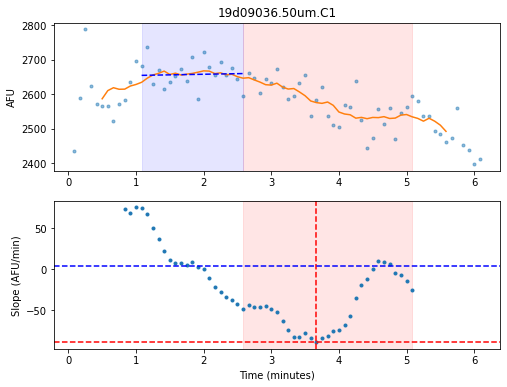

Baseline slope: 61.327152153110376 AFU/min
stimulation slope: -134.4654082644621 AFU/min


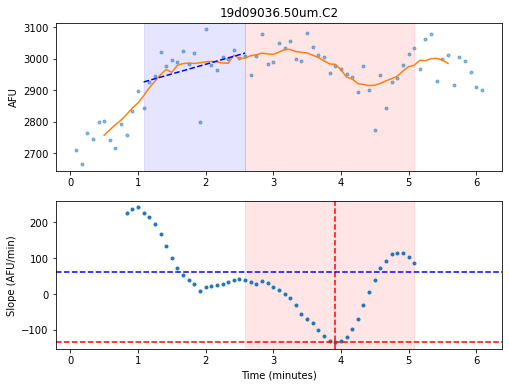

Baseline slope: -56.23713492822978 AFU/min
stimulation slope: -122.24483966942141 AFU/min


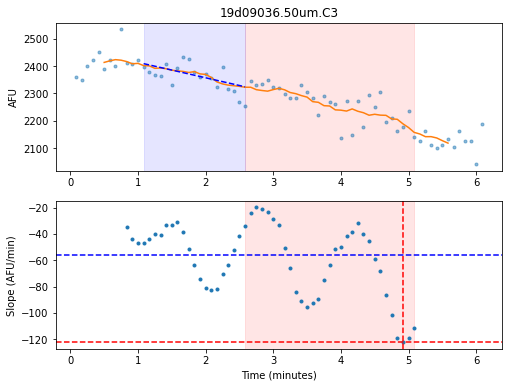

Baseline slope: -68.80744688995229 AFU/min
stimulation slope: -132.00390082644637 AFU/min


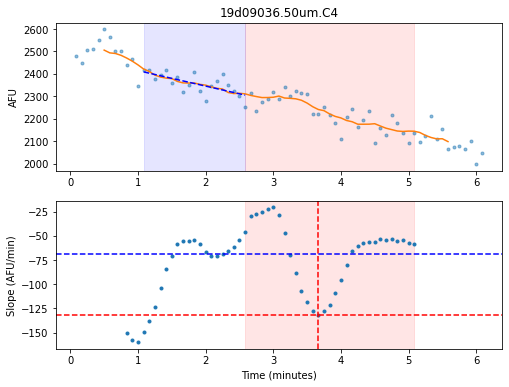

Baseline slope: -272.38609186602855 AFU/min
stimulation slope: -590.2970909090894 AFU/min


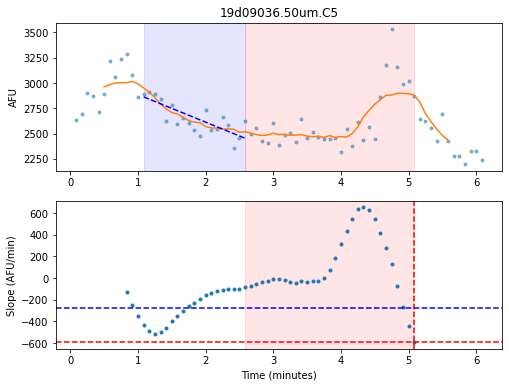

Baseline slope: -205.05797129186615 AFU/min
stimulation slope: -188.332495867769 AFU/min


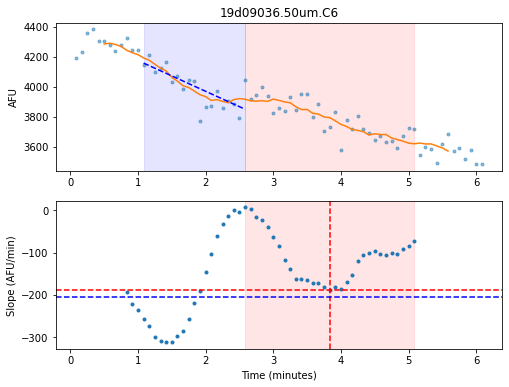

Baseline slope: -27.449414354066985 AFU/min
stimulation slope: -43.62899834710785 AFU/min


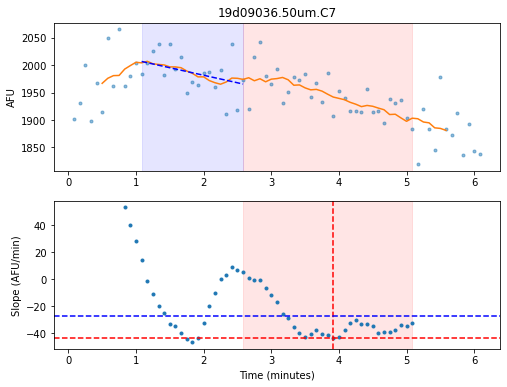

Baseline slope: 11.086135885167515 AFU/min
stimulation slope: -90.39913388429744 AFU/min


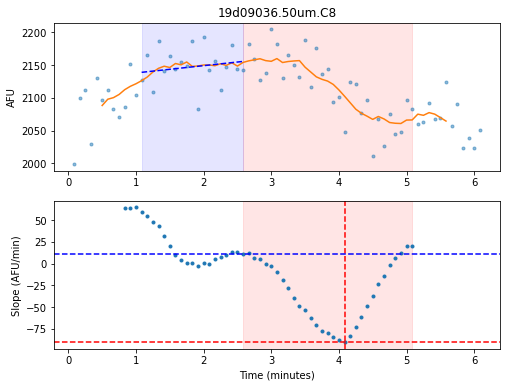

Baseline slope: -144.19471004784697 AFU/min
stimulation slope: -244.6960330578512 AFU/min


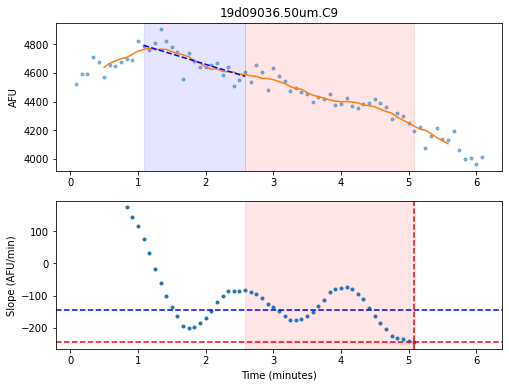

Baseline slope: -115.56527655502394 AFU/min
stimulation slope: -100.17576198347135 AFU/min


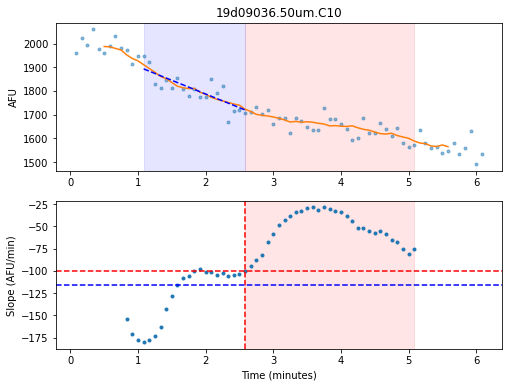

Baseline slope: -51.93086698564602 AFU/min
stimulation slope: -181.56260495867838 AFU/min


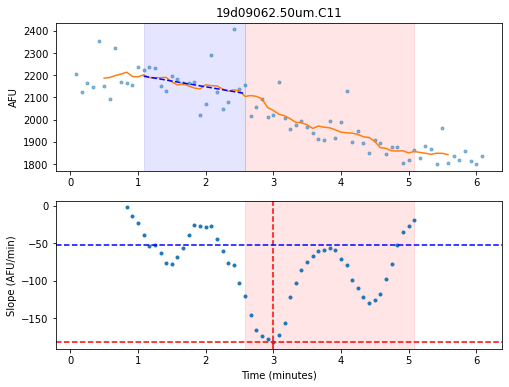

Baseline slope: -122.37150813397106 AFU/min
stimulation slope: -113.85139834710729 AFU/min


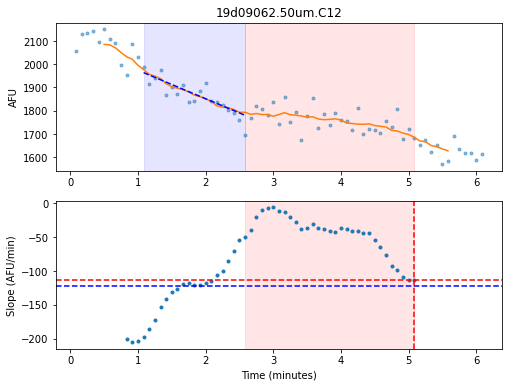

Baseline slope: -180.79625454545484 AFU/min
stimulation slope: -241.4399140495858 AFU/min


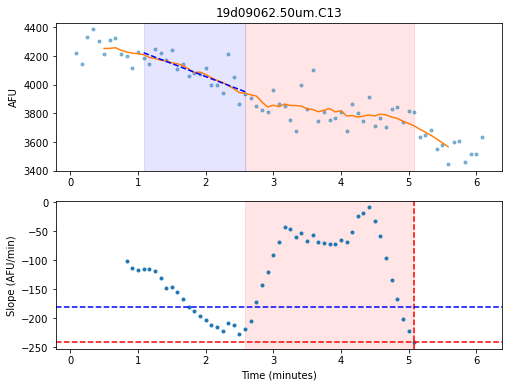

Baseline slope: -283.3966622009573 AFU/min
stimulation slope: -194.039014876033 AFU/min


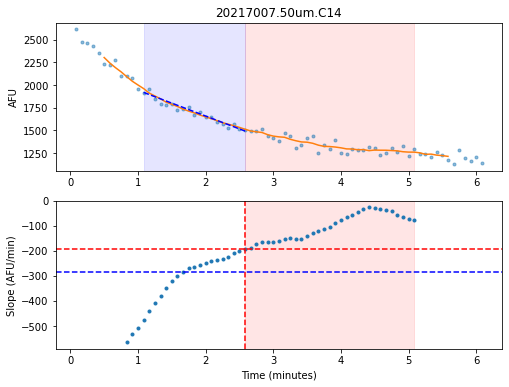

Baseline slope: -241.72883827751178 AFU/min
stimulation slope: -242.803080991736 AFU/min


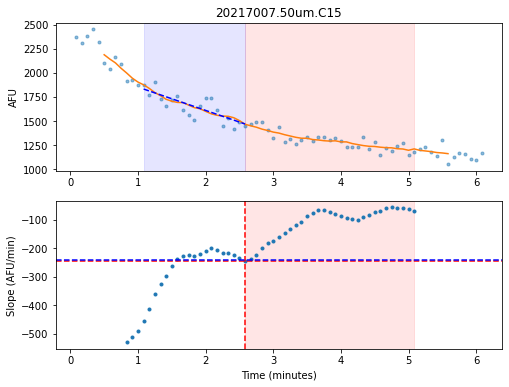

Baseline slope: -255.47317320574163 AFU/min
stimulation slope: -197.9134479338845 AFU/min


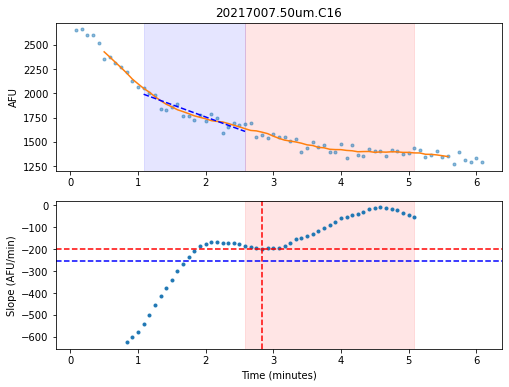

Baseline slope: -364.9845397129185 AFU/min
stimulation slope: -176.97876363636354 AFU/min


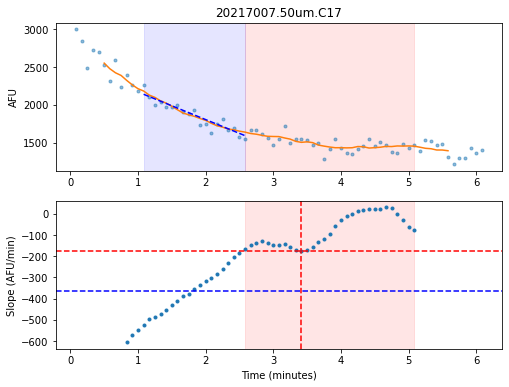

Baseline slope: -553.6609282296645 AFU/min
stimulation slope: -461.98334545454566 AFU/min


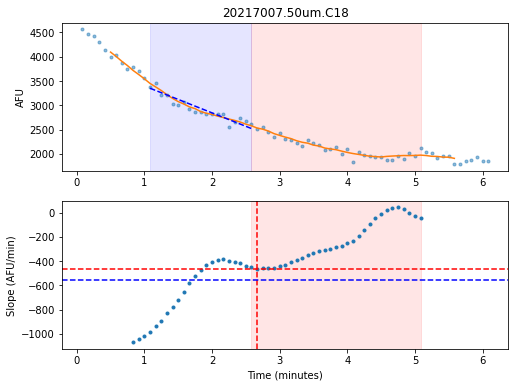

Baseline slope: -230.414761722488 AFU/min
stimulation slope: -280.0382347107437 AFU/min


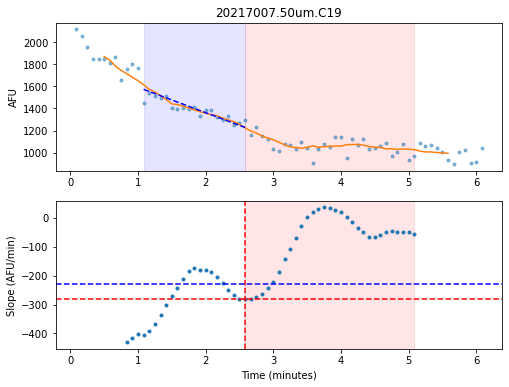

Baseline slope: -257.8952784688996 AFU/min
stimulation slope: -176.1831537190084 AFU/min


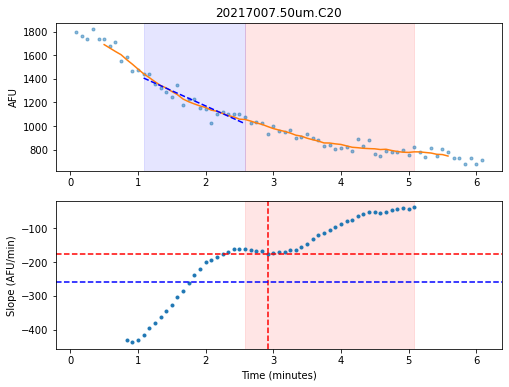

In [82]:
baselineSlopes = []
stimulationSlopes = []
for csvFilePath in csvFilePaths:
    csvData = pd.read_csv(csvFilePath, delimiter="\t")
    roiNames = csvData.columns[1:]
    framePeriodSeconds = 5.0
    framesPerMinute = 60 / framePeriodSeconds
    times = csvData['Time'].values / framesPerMinute


    for roiName in roiNames:
        plt.figure(figsize=(8, 6))
        ax1 = plt.subplot(211)
        plt.title(roiName)
        plt.ylabel("AFU")
        rawIntensity = csvData[roiName].values
        
        baselineSlope, stimulationSlope = getBaselineAndMaxStimulationSlopeFromCSV(times, rawIntensity, filterSize, regressionSize)
        baselineSlopes.append(baselineSlope)
        stimulationSlopes.append(stimulationSlope)

## Compare Baseline vs. Stimulation Slopes

The users can plot the basleine slope and the peak stimulation slope of each cell, and report the p-value in the title by performing a paired t-test between baseline slopes and peak stimulation slopes.

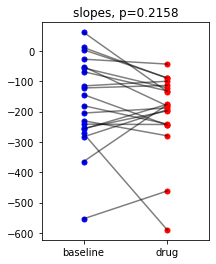

In [83]:
plotTools.plotPairs(baselineSlopes, stimulationSlopes, "slopes")

## Assess Responsiveness of All Cells

Generate a scatter plot showing the slope difference of each cell.

<ipython-input-84-c0628bcd07ea>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(roiNames, rotation=45, ha='right')


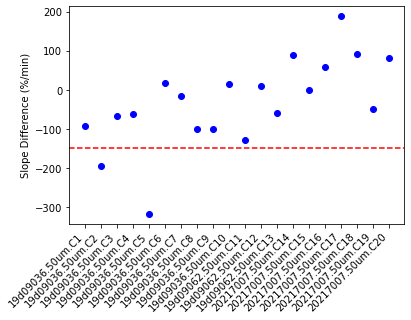

In [84]:
slopeThreshold = -150
stimulationEffects = []
for i in range(len(roiNames)):
    stimulationEffects.append(stimulationSlopes[i] - baselineSlopes[i])

plt.figure (figsize=(6, 4))
plt.ylabel("Slope Difference (%/min)")
plt.plot(roiNames, stimulationEffects, 'o', color = "b")
plt.gca().set_xticklabels(roiNames, rotation=45, ha='right')
plt.axhline(slopeThreshold, color='r', ls='--')
plt.show()

## Define Cells as Responsive vs. Non-Responsive

The users can define the <b>slopeThreshold</b>. The difference between baseline slope and peak stimulation slope must be more negative than this value to be a responder
slopeThreshold

In [85]:
stimulationEffects=statsTools.responderByDelta(roiNames, stimulationEffects, slopeThreshold)

Responders = 2
Non-Responders = 18
Response rate = 10.0%
Responders: 19d09036.50um.C2, 19d09036.50um.C5
Non-Responders: 19d09036.50um.C1, 19d09036.50um.C3, 19d09036.50um.C4, 19d09036.50um.C6, 19d09036.50um.C7, 19d09036.50um.C8, 19d09036.50um.C9, 19d09036.50um.C10, 19d09062.50um.C11, 19d09062.50um.C12, 19d09062.50um.C13, 20217007.50um.C14, 20217007.50um.C15, 20217007.50um.C16, 20217007.50um.C17, 20217007.50um.C18, 20217007.50um.C19, 20217007.50um.C20
